In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('laptop_price - dataset.csv')

In [4]:
dataset

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [5]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtypes=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [6]:
quan

['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']

In [7]:
qual

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'CPU_Company',
 'CPU_Type',
 'Memory',
 'GPU_Company',
 'GPU_Type',
 'OpSys']

In [8]:
dataset.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [9]:
np.percentile(dataset["Weight (kg)"], 100)

np.float64(4.7)

In [10]:
descriptive=pd.DataFrame(index=["Mean", "Median", "Mode", "Q1: 25%", "Q2: 50%", "Q3: 75%", "Q4: 100%", "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max"], columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1: 25%"]=np.percentile(dataset[columnName], 25)
    descriptive[columnName]["Q2: 50%"]=np.percentile(dataset[columnName], 50)
    descriptive[columnName]["Q3: 75%"]=np.percentile(dataset[columnName], 75)
    descriptive[columnName]["Q4: 100%"]=np.percentile(dataset[columnName], 100)
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3: 75%"]-descriptive[columnName]["Q1: 25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1: 25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3: 75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\2192466100.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\2192466100.py:4: Futu

In [11]:
descriptive

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Mean,15.022902,2.30298,8.440784,2.040525,1134.969059
Median,15.6,2.5,8.0,2.04,989.0
Mode,15.6,2.5,8,2.2,1099.0
Q1: 25%,14.0,2.0,4.0,1.5,609.0
Q2: 50%,15.6,2.5,8.0,2.04,989.0
Q3: 75%,15.6,2.7,8.0,2.31,1496.5
Q4: 100%,18.4,3.6,64.0,4.7,6099.0
IQR,1.6,0.7,4.0,0.81,887.5
1.5rule,2.4,1.05,6.0,1.215,1331.25
Lesser,11.6,0.95,-2.0,0.285,-722.25


## REPLACING OUTLIERS

In [12]:
lesser=[]
greater=[]
for colName in quan:
    if descriptive[colName]["Min"]<descriptive[colName]["Lesser"]:
        lesser.append(colName)
    if descriptive[colName]["Max"]>descriptive[colName]["Greater"]:
        greater.append(colName)

In [13]:
lesser

['Inches', 'CPU_Frequency (GHz)']

In [14]:
greater

['Inches', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']

In [15]:
for colmName in lesser:
    dataset[colmName][dataset[colmName]<descriptive[colmName]["Lesser"]]=descriptive[colmName]["Lesser"]
for colmName in greater:
    dataset[colmName][dataset[colmName]>descriptive[colmName]["Greater"]]=descriptive[colmName]["Greater"]

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\3576517066.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset[colmName][dataset[colmName]<descriptive[colmName]["Lesser"]]=descriptive[colmName]["Lesser"]
C:\Users\jspri\AppData\Local

In [16]:
descriptive=pd.DataFrame(index=["Mean", "Median", "Mode", "Q1: 25%", "Q2: 50%", "Q3: 75%", "Q4: 100%", "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max"], columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1: 25%"]=np.percentile(dataset[columnName], 25)
    descriptive[columnName]["Q2: 50%"]=np.percentile(dataset[columnName], 50)
    descriptive[columnName]["Q3: 75%"]=np.percentile(dataset[columnName], 75)
    descriptive[columnName]["Q4: 100%"]=np.percentile(dataset[columnName], 100)
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3: 75%"]-descriptive[columnName]["Q1: 25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1: 25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3: 75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\2192466100.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\2192466100.py:4: Futu

In [17]:
lesser=[]
greater=[]
for colName in quan:
    if descriptive[colName]["Min"]<descriptive[colName]["Lesser"]:
        lesser.append(colName)
    if descriptive[colName]["Max"]>descriptive[colName]["Greater"]:
        greater.append(colName)

In [18]:
lesser

[]

In [19]:
greater

[]

## FREQUENCY

In [20]:
def freqTable(columnName, dataset):
    freqTable=pd.DataFrame(columns=["Uniques_Values", "Frequency", "Relative_Frequency", "cumsum"])
    freqTable["Uniques_Values"]=dataset[columnName].value_counts().index
    freqTable["Frequency"]=dataset[columnName].value_counts().values
    freqTable["Relative_Frequency"]=freqTable["Frequency"]/1275
    freqTable["cumsum"]=freqTable["Relative_Frequency"].cumsum()
    return freqTable

In [21]:
freqTable("Price (Euro)", dataset)

,Uniques_Values,Frequency,Relative_Frequency,cumsum
0,2827.75,28,0.021961,0.021961
1,1099.00,14,0.010980,0.032941
2,1799.00,14,0.010980,0.043922
3,1499.00,12,0.009412,0.053333
4,1299.00,11,0.008627,0.061961
...,...,...,...,...
762,244.99,1,0.000784,0.996863
763,1948.99,1,0.000784,0.997647
764,1262.40,1,0.000784,0.998431
765,498.90,1,0.000784,0.999216


## HSK

In [22]:
descriptive=pd.DataFrame(index=["Mean", "Median", "Mode", "Q1: 25%", "Q2: 50%", "Q3: 75%", "Q4: 100%", "IQR", "1.5rule", "Lesser", 
                                "Greater", "Min", "Max", "kurtosis", "skew"], columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1: 25%"]=np.percentile(dataset[columnName], 25)
    descriptive[columnName]["Q2: 50%"]=np.percentile(dataset[columnName], 50)
    descriptive[columnName]["Q3: 75%"]=np.percentile(dataset[columnName], 75)
    descriptive[columnName]["Q4: 100%"]=np.percentile(dataset[columnName], 100)
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3: 75%"]-descriptive[columnName]["Q1: 25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1: 25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3: 75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()
    descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
    descriptive[columnName]["skew"]=dataset[columnName].skew()

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\1391730951.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\1391730951.py:5: Futu

In [23]:
descriptive

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Mean,15.027529,2.303059,7.827451,2.016067,1120.189075
Median,15.6,2.5,8.0,2.04,989.0
Mode,15.6,2.5,8,2.2,2827.75
Q1: 25%,14.0,2.0,4.0,1.5,609.0
Q2: 50%,15.6,2.5,8.0,2.04,989.0
Q3: 75%,15.6,2.7,8.0,2.31,1496.5
Q4: 100%,18.0,3.6,14.0,3.525,2827.75
IQR,1.6,0.7,4.0,0.81,887.5
1.5rule,2.4,1.05,6.0,1.215,1331.25
Lesser,11.6,0.95,-2.0,0.285,-722.25


In [24]:
import seaborn as sns

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\3223000204.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Price (Euro)"])


<Axes: xlabel='Price (Euro)', ylabel='Density'>

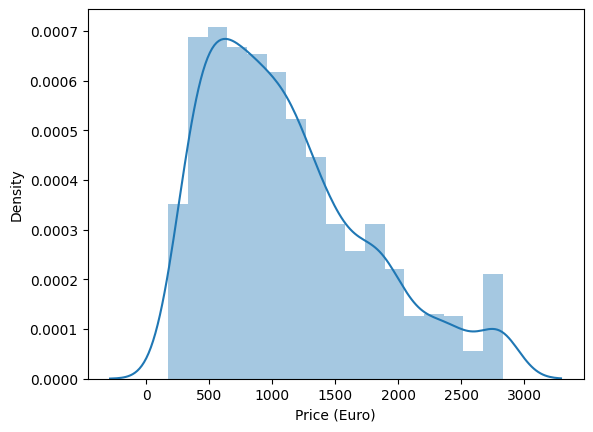

In [25]:
sns.distplot(dataset["Price (Euro)"])

<Axes: xlabel='Price (Euro)', ylabel='Count'>

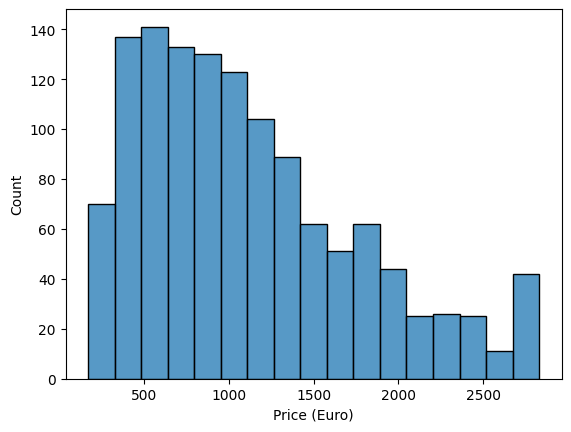

In [26]:
sns.histplot(dataset["Price (Euro)"])

In [27]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Purple')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    #define the distribution
    dist=norm(sample_mean, sample_std)
    #sample probabilities or a range of outcomes
    values=[value for value in range(startrange, endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({}, {}:{}".format(startrange, endrange, sum(probabilities)))
    return prob

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\440960902.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Purple')


Mean=1120.189, Standard Deviation=645.294
The area between range(1000, 2000:0.487685194845785


np.float64(0.487685194845785)

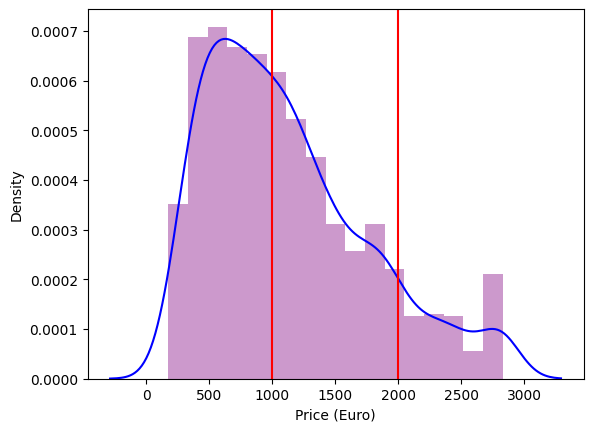

In [28]:
get_pdf_probability(dataset["Price (Euro)"], 1000, 2000)

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Price (Euro)'])
ecdf(1500)

np.float64(0.7615686274509804)

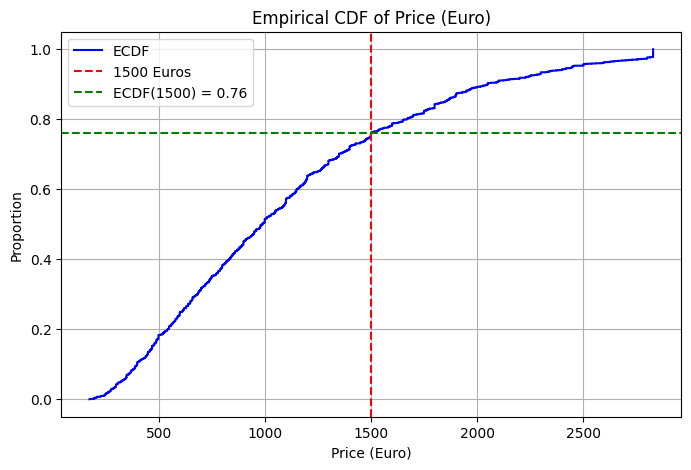

In [30]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Create ECDF
ecdf = ECDF(dataset['Price (Euro)'])

# Plot ECDF
plt.figure(figsize=(8, 5))
plt.step(ecdf.x, ecdf.y, where="post", color="blue", label="ECDF")
plt.axvline(x=1500, color="red", linestyle="--", label="1500 Euros")
plt.axhline(y=ecdf(1500), color="green", linestyle="--", label=f"ECDF(1500) = {ecdf(1500):.2f}")
plt.title("Empirical CDF of Price (Euro)")
plt.xlabel("Price (Euro)")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()


In [31]:
def stdNDFgraph(dataset):
    #converted to standard normal ditribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score, kde=True)
    sum(z_score)/len(z_score)

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\1452755445.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


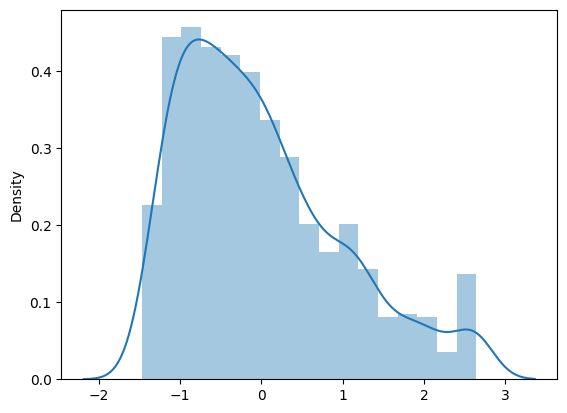

In [32]:
stdNDFgraph(dataset["Price (Euro)"])

In [33]:
descriptive=pd.DataFrame(index=["Mean", "Median", "Mode", "Q1: 25%", "Q2: 50%", "Q3: 75%", "Q4: 100%", "IQR", "1.5rule", "Lesser", 
                                "Greater", "Min", "Max", "kurtosis", "skew", "Var", "std"], columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1: 25%"]=np.percentile(dataset[columnName], 25)
    descriptive[columnName]["Q2: 50%"]=np.percentile(dataset[columnName], 50)
    descriptive[columnName]["Q3: 75%"]=np.percentile(dataset[columnName], 75)
    descriptive[columnName]["Q4: 100%"]=np.percentile(dataset[columnName], 100)
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3: 75%"]-descriptive[columnName]["Q1: 25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1: 25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3: 75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()
    descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
    descriptive[columnName]["skew"]=dataset[columnName].skew()
    descriptive[columnName]["Var"]=dataset[columnName].var()
    descriptive[columnName]["std"]=dataset[columnName].std()

C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\3617981546.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\jspri\AppData\Local\Temp\ipykernel_6504\3617981546.py:5: Futu

In [34]:
descriptive

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Mean,15.027529,2.303059,7.827451,2.016067,1120.189075
Median,15.6,2.5,8.0,2.04,989.0
Mode,15.6,2.5,8,2.2,2827.75
Q1: 25%,14.0,2.0,4.0,1.5,609.0
Q2: 50%,15.6,2.5,8.0,2.04,989.0
Q3: 75%,15.6,2.7,8.0,2.31,1496.5
Q4: 100%,18.0,3.6,14.0,3.525,2827.75
IQR,1.6,0.7,4.0,0.81,887.5
1.5rule,2.4,1.05,6.0,1.215,1331.25
Lesser,11.6,0.95,-2.0,0.285,-722.25
